# House Sales Prices Analysis Using Multi-Linear Regression

## <small>1. Businness Understanding</small>

### <small>a) Introduction</small>

The goal of this project is to analyze house sales data using multiple regression modelling techniques. By employing multiple regression, we aim to identify and quantify the relationships that exists between various factors or predictors and house sale prices.This analysis will provide insights into the key drivers of house prices and help shareholders make informed decisions related to real estate investment.

### <small> b) Problem Statement</small>

This project seek to address the importannce of identifying the factors that significantly affect house prices.Traditional approaches often rely on anectodal evidence or limited analysis, resulting into inaccurate insights. This knowledge gap hampers stakeholders' ability to predict and interpret house proce flactuations effectively. To address this problem, we propose utilizing multiple regression modeling techniques to analyze house sales data comprehensively. By conducting multiple regression, we can identify the relationship between different factors and house sales prices, taking into account the collective impact of multiple independent variables.

### <small>c) Main Objective</small>

To analyze house sales data using multiple regression modeling techniques to identify and quantify the key factors influencing house sales prices and help shareholders make data driven decisions on investing in real estate.

### <small>d) Subjective Objectives</small>

1. Conduct explanatory data analysis to gain insights on the relationships between different variables and target variable, assisting in selection of relevant variables for regression model.
2. Develop multiple regression model to predict house sale prices, considering the selected independent variables and their impact on the dependent variable.Validate the model assumptions, assess its goodness of fit and refine the model if necesssay.
3. Interpret the coefficients of the independent variables in the model to determine their individual impact on house prices, identifying the most influential factors driving thr house sales prices and their respective effects.
4. Evaluate and validate the performnance of the model.
5. Provide actionable insights and recommendations based on the analysis to assist real estate investors, and policymakers in making informed decisions regarding property investment, market trends, and economic planning.

### <small> e) Notebook Structure</small>

1. Reading the data.
2. Data Cleaning and Preprocessing.
3. Multiple Regression Modelling.
4. Model Evaluation and Undesrtanding.
5. Results Presentation and Conclusions.
6. Recommendations
7. References.

### <small> f) Data Understanding</small>

The dataset used in this project contains information about the factors affecting the housing prices including variables such as date, sqft_above, view and sqft_basement. Explanatory data analysis will be used to get a clear understanding of the dataset including the missing values, checking the data types, identifying outliers and also extracting relevant features for analysis. 

## 2. Importing Inportant Packages

In [1035]:
import numpy as np # for algebra
import pandas as pd # for data processing
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import rcParams
rcParams['figure.figsize'] = 7, 5
pd.options.display.max_columns = 25
sns.set(style='darkgrid')

#validation
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.rom sklearn.preprocessing import StandardScaler



## 3. Reading Data

In [1036]:
df = pd.read_csv('data/kc_house_data.csv')
# See the head of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1037]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

## 4. Explanatory Data Analysis

In [1038]:
# Check the shape of the dataset
print(f"Shape of df is : {df.shape}")

Shape of df is : (21597, 21)


In [1039]:
# An overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1040]:
# Statistical distribjtion of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 5. Data Wrangling

### <small> a) Data Cleaning </small>

In [1041]:
# Check for null values
pd.DataFrame(df.isna().sum()).T


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,2376,63,0,0,0,0,0,3842,0,0,0,0,0


In [1042]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [1043]:
# Fill all the null values with 'Unknown' since the column contains categorical data
df['waterfront'].fillna('NO',inplace=True)
# Check for missing values now
pd.DataFrame(df.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,63,0,0,0,0,0,3842,0,0,0,0,0


In [1044]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [1045]:
# Deal with missing values in the view column
# Check for the counts of different categories
df['view'].value_counts()


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [1046]:
#  Replace the missing values with the most frequent category
df['view'].fillna('NONE',inplace=True)

In [1047]:
# check forthe count unique values in the year renoveted column 
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [1048]:
# Replace null with the most frequent value
df['yr_renovated'].fillna(0,inplace=True)

In [1049]:
# Check for null values
pd.DataFrame(df.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


No missing values!

In [1050]:
#iterate through the columns to see the frequency of different values
for i in df.columns:
    print(df[i].value_counts())

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
1/31/2015      1
5/24/2015      1
5/17/2014      1
7/27/2014      1
Name: date, Length: 372, dtype: int64
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.

In [1051]:
# Drop rows with '?' in 'sqft_basement'
df = df[df['sqft_basement'] != '?']

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [1052]:
# Convert 'sqft_basement' column to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

### b) Encoding Categorical Columns in the Data

In [1053]:
# Define the order of the categories
category_order = {
    'NO': 0,
    "YES" : 1
}

# Perform ordinal encoding on the "waterfront" column
df["waterfront_encoded"] = df["waterfront"].map(category_order)

# Replace the original "waterfront" column with the encoded values
df["waterfront"] = df["waterfront_encoded"]

# Check the updated dataset
df['waterfront'].value_counts()



0    21001
1      142
Name: waterfront, dtype: int64

In [1054]:
# Let's check the count of the encoded column of waterfront
df['waterfront'].value_counts()

0    21001
1      142
Name: waterfront, dtype: int64

In [1055]:
# Encode the column view
# Define the order of the categories
category_order = {
    "NONE": 0,
    "AVERAGE": 1,
    "GOOD": 2,
    "FAIR": 3,
    "EXCELLENT": 4
}

# Perform ordinal encoding on the "view" column
df["view_encoded"] = df["view"].map(category_order)

# Replace the original "view" column with the encoded values
df["view"] = df["view_encoded"]

# Check the updated dataset
df['view'].value_counts()


0    19079
1      930
2      496
3      327
4      311
Name: view, dtype: int64

In [1056]:
# Let's encode the condition column 
# Define the order of the categories
category_order = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

# Perform ordinal encoding on the "condition" column
df["condition_encoded"] = df["condition"].map(category_order)

# Replace the original "condition" column with the encoded values
df["condition"] = df["condition_encoded"]

# Check the updated dataset
df['condition'].value_counts()

3    13726
4     5557
5     1666
2      166
1       28
Name: condition, dtype: int64

In [1057]:
# Encode the grade column
# Define the order of the categories
category_order = {
    "3 Poor": 3,
    "5 Fair": 5,
    "4 Low": 4,
    "6 Low Average": 6,
    "7 Average": 7,
    "8 Good": 8,
    "9 Better": 9,
    "10 Very Good": 10,
    "11 Excellent": 11,
    "12 Luxury": 12,
    "13 Mansion": 13
}

# Perform ordinal encoding on the "grade" column
df["grade_encoded"] = df["grade"].replace(category_order)

# Replace the original "grade" column with the encoded values
df["grade"] = df["grade_encoded"]

# Check the updated dataset
df['grade'].value_counts()

7     8788
8     5933
9     2557
6     1997
10    1112
11     391
5      235
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [1058]:
# View the encoded dataset
df_encoded = df
df_encoded

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_encoded,view_encoded,condition_encoded,grade_encoded
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,3,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,3,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,3,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,5,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,3,8
21139,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,3,8
21140,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,0,3,7
21141,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,0,3,8


In [1059]:
# Convert "yr_renovated" column to integer
df_encoded["yr_renovated"] = df_encoded["yr_renovated"].astype(int)

In [1060]:
# Drop the encoded columns
df_updated= df_encoded.drop(["waterfront_encoded", "view_encoded", "condition_encoded", "grade_encoded"], axis=1)

# Check the updated dataset
df_updated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21139,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21140,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21141,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


In [1061]:
# Check the correlation between the independent factors and the target variable house prices
pd.DataFrame(df_updated.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.702328
grade,0.667738
sqft_above,0.605143
sqft_living15,0.586415
bathrooms,0.525889
view,0.387878
sqft_basement,0.325008
bedrooms,0.309204
lat,0.306507


From the results above sqft_living has the highest positive correlation coefficient (0.701917), indicating a relatively strong positive linear relationship with the price of a property. As the square footage of the living area increases, the price tends to increase as well.
sqft_above also has a positive correlation coefficient of 0.605368, indicating a moderately strong positive linear relationship with the price. It represents the square footage of the interior living space above ground level.
sqft_lot has a weak positive correlation coefficient of 0.089876. It represents the square footage of the land area of the property.
id: This feature has a weak negative correlation coefficient of -0.016772. It represents the identifier of the property, which is not meaningful in terms of correlation with price.
zipcode has a weak negative correlation coefficient of -0.053402. It represents the zipcode of the property, which also does not show a strong correlation with price.

Keep in mind that correlation does not imply causation. These correlation coefficients only indicate the linear relationship between the features and the price in the dataset, and there may be other factors not captured in the dataset that affect the price of a property

### c) Formating Date Types

In [1062]:
# Drop rows with invalid dates
df_updated = df_updated.dropna(subset=['date'])

# Convert the date column to datetime
df_updated['date'] = pd.to_datetime(df_updated['date'])

# Calculate years since built
df_updated['years_since_built'] = df_updated['date'].dt.year - df_updated['yr_built']

# Calculate years to renovation
df_updated['years_since_renovation'] =np.abs(df_updated['yr_renovated']- df_updated['yr_built']) 
df_updated['years_since_renovation'] = df_updated.years_since_renovation.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

# Check the updated dataset
df_updated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509,5,0.0
21139,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200,1,0.0
21140,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007,5,0.0
21141,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287,11,0.0


In [1063]:
# Replace values greater than 50 in years_since_renovation with years_since_built
df_updated.loc[df_updated['years_since_renovation'] > 100, 'years_since_renovation'] = df_updated['years_since_built']

# Check the updated dataset
df_updated
# This will take into account the huge numbers that comes as a result of having a 0 as our time of renovation, so we will take the time since building as our time since renovation

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509,5,0.0
21139,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200,1,0.0
21140,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007,5,0.0
21141,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287,11,0.0


### d) Dropping Irrelevant Columns

In [1064]:
df_updated.drop(['id','date','yr_built','yr_renovated'], axis=1,inplace=True)
df_updated.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,59,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,63,40.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,82,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,49,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,28,0.0


### e) Relationship between Predictor Variables

In [1065]:
# Let's check the independent variables with high collinaerity
corr_feat = []
for j , k in df_updated.corr().iterrows():
    i=0
    for r in range(len(k)):
        if j!= k.index[i]:
            if k.values[i] >=0.5:
                corr_feat.append([j, k.index[i], k.values[i]])
        i += 1
corr_feat

[['price', 'bathrooms', 0.5258888494879175],
 ['price', 'sqft_living', 0.7023277028331513],
 ['price', 'grade', 0.6677378857704818],
 ['price', 'sqft_above', 0.6051426301832735],
 ['price', 'sqft_living15', 0.5864152257201962],
 ['bedrooms', 'bathrooms', 0.5138404635699438],
 ['bedrooms', 'sqft_living', 0.5779981422790634],
 ['bathrooms', 'price', 0.5258888494879175],
 ['bathrooms', 'bedrooms', 0.5138404635699438],
 ['bathrooms', 'sqft_living', 0.7552775596925856],
 ['bathrooms', 'floors', 0.5040706128279822],
 ['bathrooms', 'grade', 0.6664933295181273],
 ['bathrooms', 'sqft_above', 0.6864562868930307],
 ['bathrooms', 'sqft_living15', 0.570128649361357],
 ['sqft_living', 'price', 0.7023277028331513],
 ['sqft_living', 'bedrooms', 0.5779981422790634],
 ['sqft_living', 'bathrooms', 0.7552775596925856],
 ['sqft_living', 'grade', 0.7631010757095639],
 ['sqft_living', 'sqft_above', 0.8766778643731963],
 ['sqft_living', 'sqft_living15', 0.7563885321411592],
 ['sqft_lot', 'sqft_lot15', 0.72064

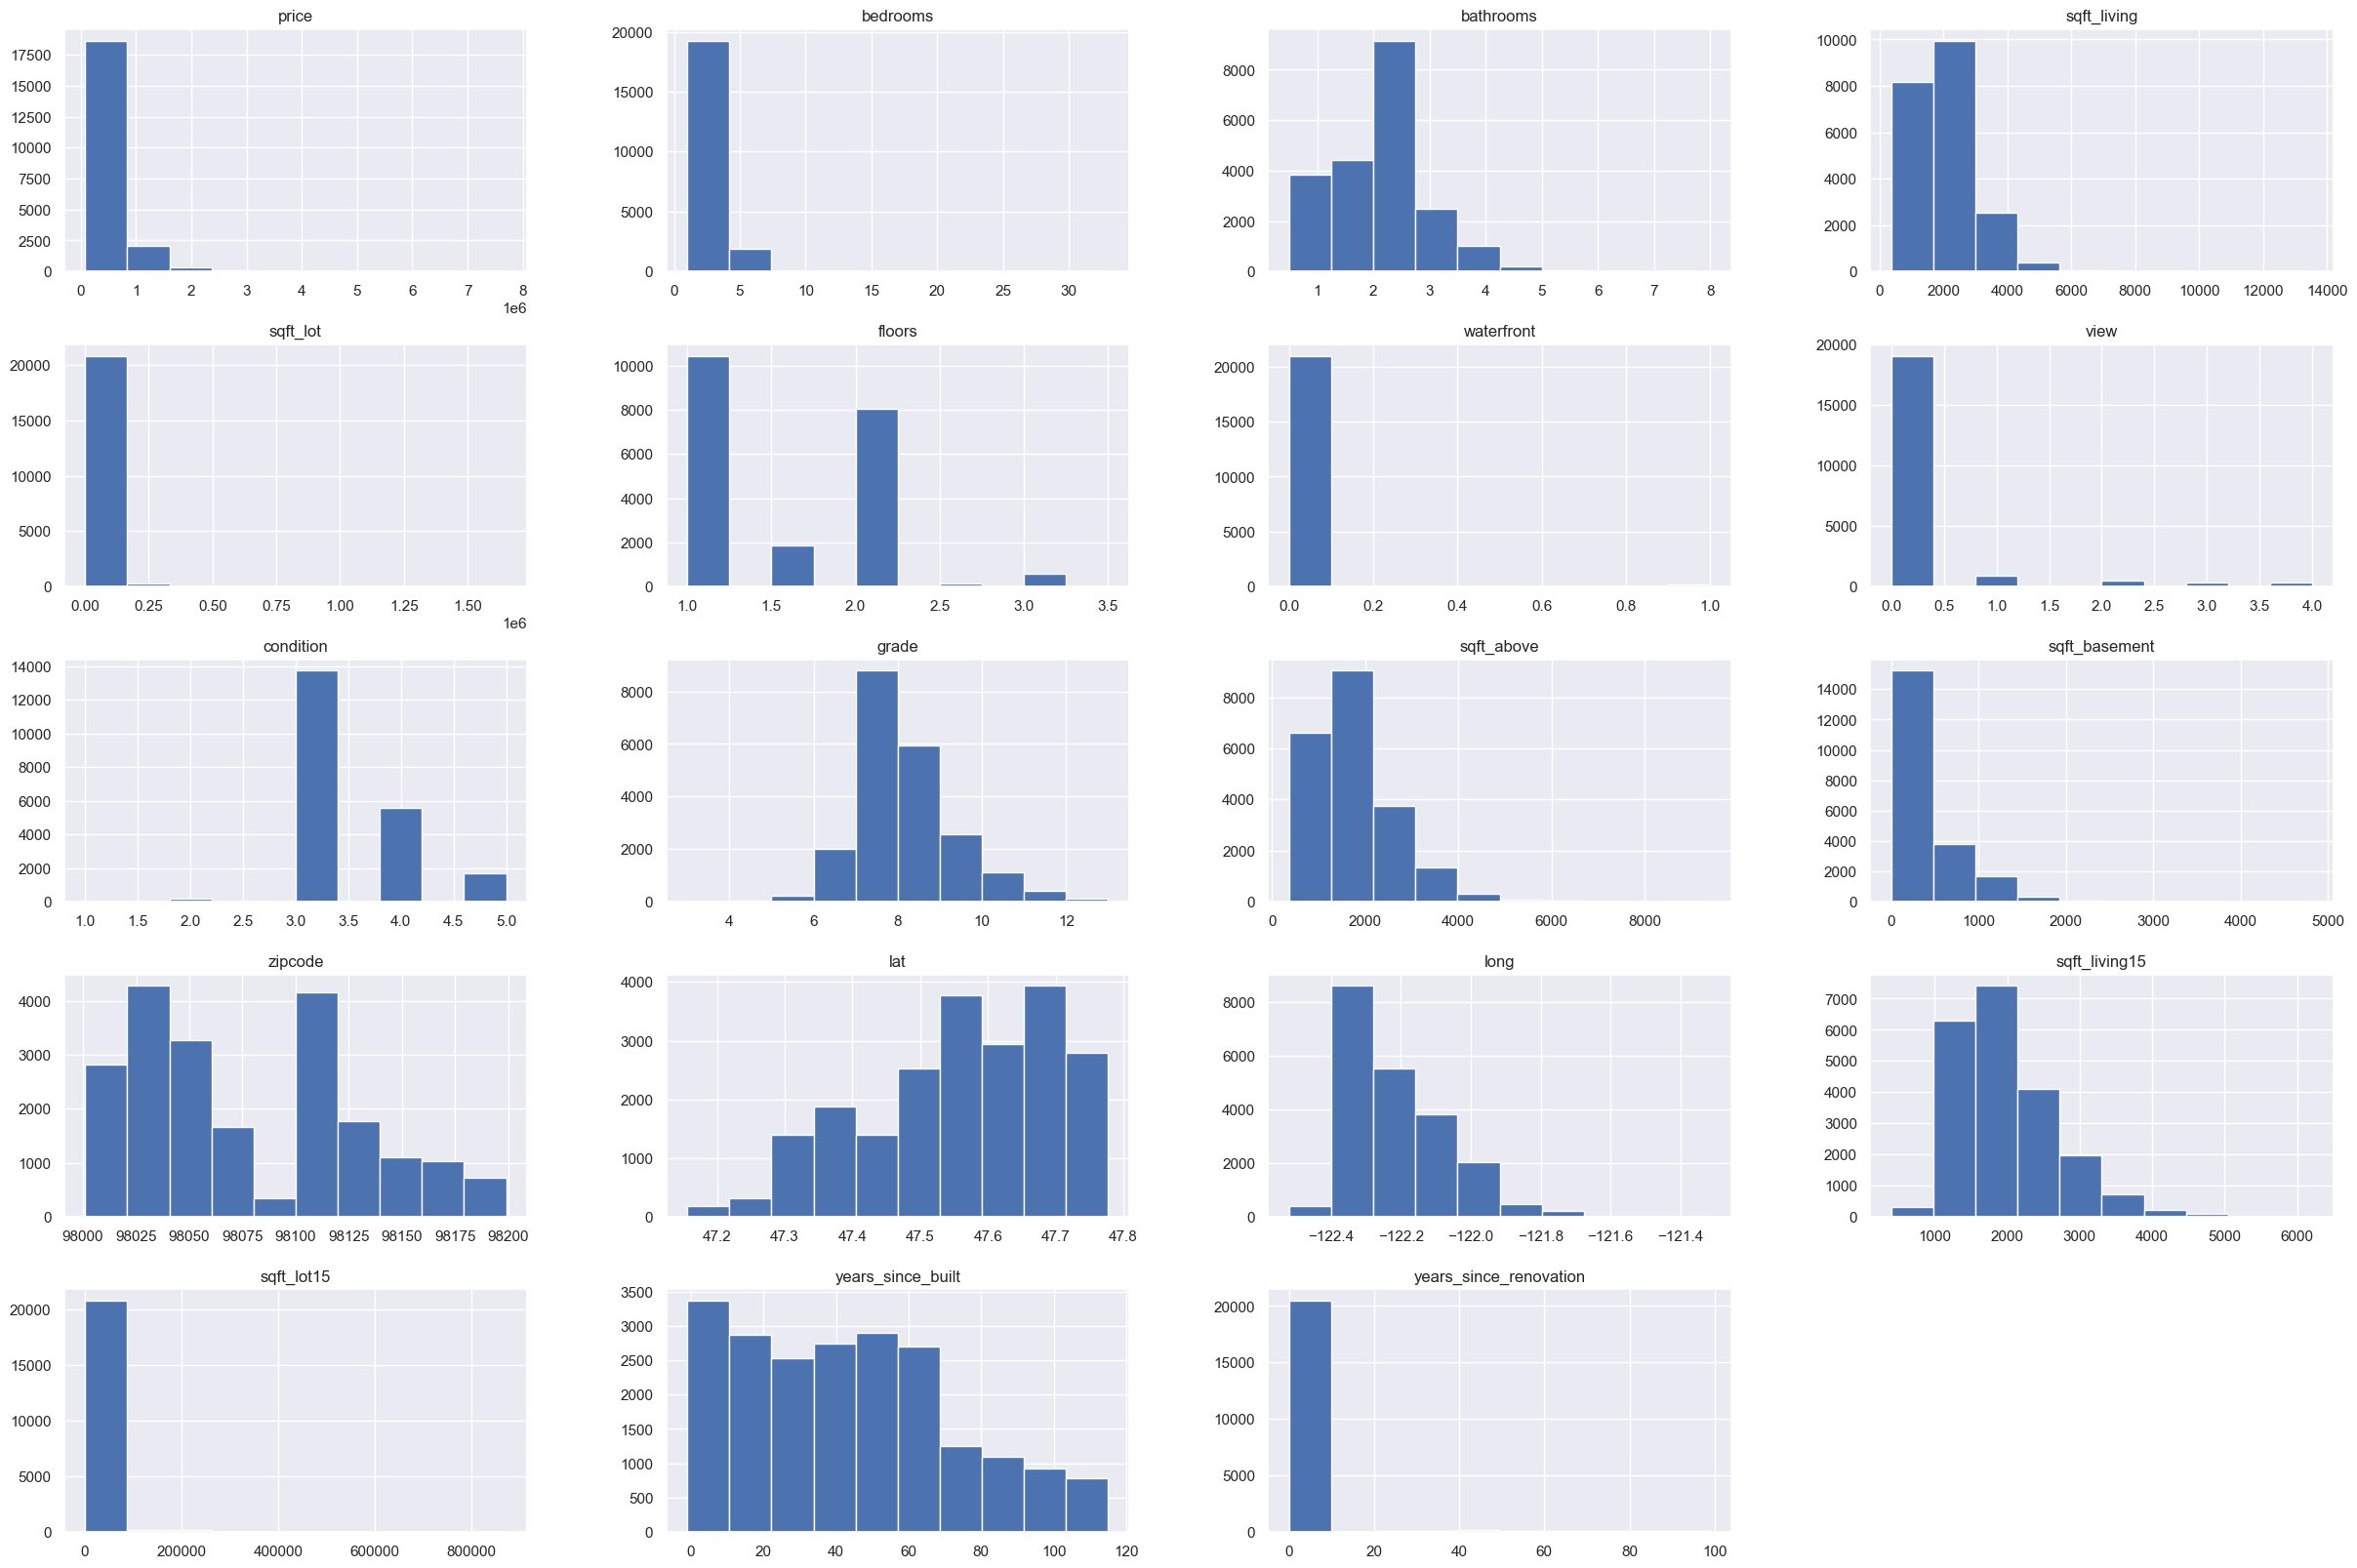

In [1066]:
# plot the frequency for the data columns
df_updated.hist(figsize=(30,20))
plt.show()

Now let's adresss multicollinearity where we have two predictor variables that are highly correlated.  This will improve interpretability of our results, reduce redundancy and even enhsnce model stability.

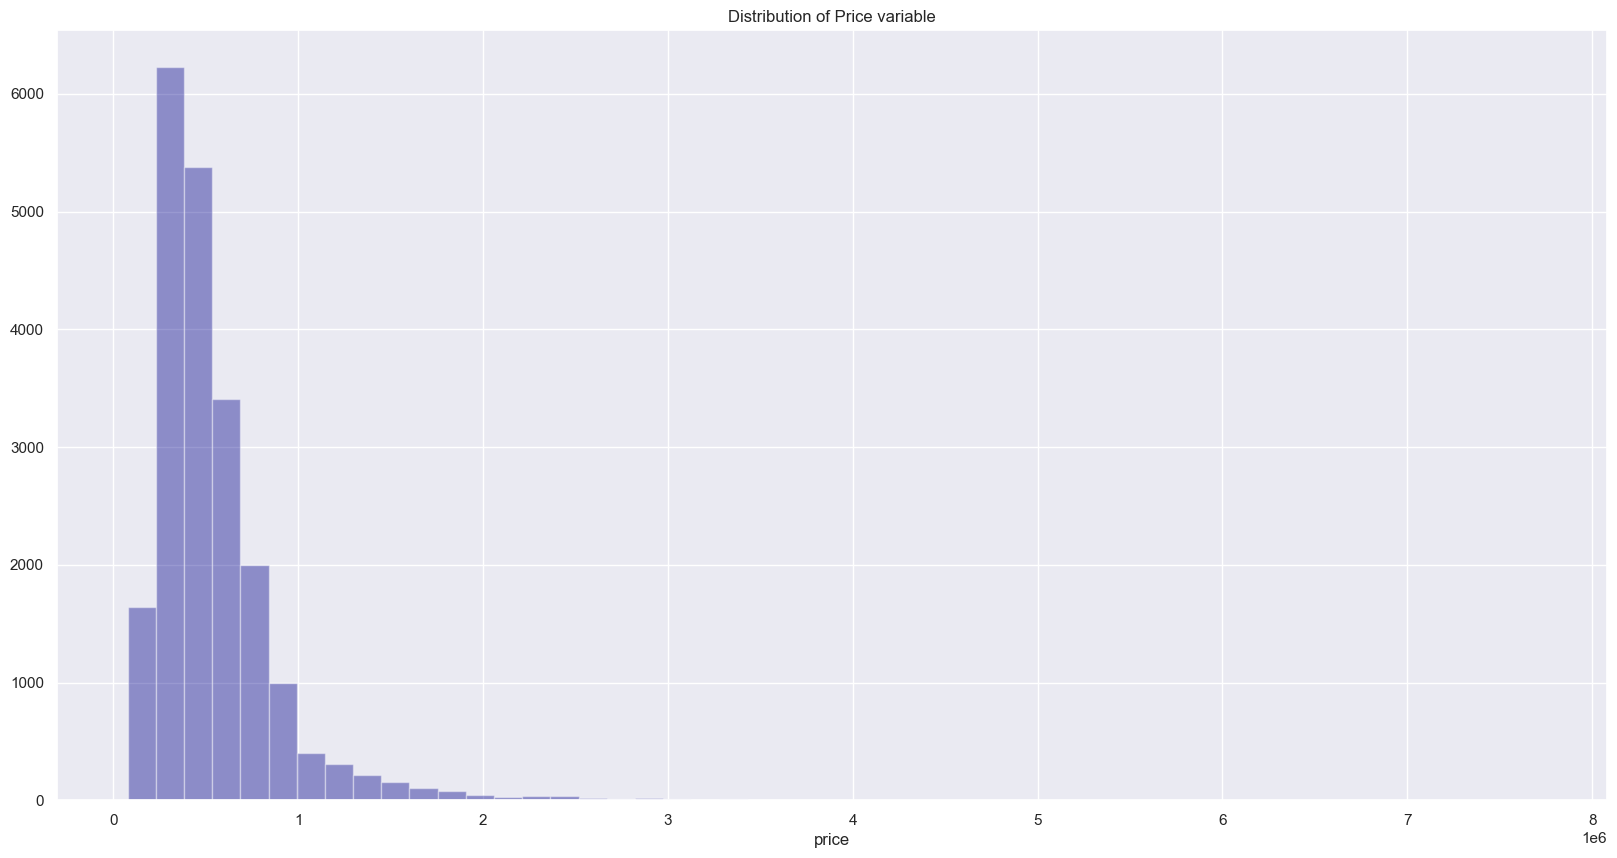

In [1067]:
# Remove variables with collinearity greater than 0.8
feat =[]
for i in corr_feat:
    if i[2] >= 0.8:
        feat.append(i[0])
        feat.append(i[1])
        
df_updated.drop(list(set(feat)), axis=1, inplace=True)
df_updated.head()

#plot the (dependent) variable to see its distribution
# plt.title()
plt.figure(figsize=(20,10))
sns.distplot(df_updated.price,color='darkblue', kde=False).set_title('Distribution of Price variable')
plt.show()

### f) Outliers Identification

In [1068]:
# Using Zscore method lets identify our outliers
import numpy as np

# Calculate z-scores
z_scores = (df_updated['price'] - df_updated['price'].mean()) / df_updated['price'].std()

# Define a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = df_updated[np.abs(z_scores) > threshold]

# Print the outliers
outliers

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
19,2000000.0,3,2.75,44867,1.0,0,4,3,9,720.0,98040,47.5316,-122.233,4110,20336,46,0.0
147,2250000.0,4,3.25,19850,2.0,0,2,3,12,1640.0,98006,47.5620,-122.162,3160,9750,9,0.0
239,2400000.0,4,2.50,8354,1.0,1,4,3,9,1820.0,98074,47.6338,-122.072,3120,18841,14,0.0
262,2900000.0,4,3.25,20100,1.5,0,1,3,11,300.0,98004,47.6312,-122.223,3890,20060,33,0.0
275,2050000.0,5,3.00,8480,2.0,0,3,5,9,1200.0,98122,47.6166,-122.287,3050,7556,110,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21046,1870000.0,4,3.75,8797,2.0,0,0,3,11,500.0,98039,47.6351,-122.236,2660,12150,9,0.0
21062,3000000.0,4,3.75,14823,1.0,0,0,3,11,910.0,98004,47.6200,-122.207,3030,12752,2,0.0
21071,1880000.0,5,3.50,13000,2.0,0,2,3,10,1490.0,98006,47.5382,-122.111,5790,12969,1,0.0
21099,1700000.0,4,3.50,8963,2.0,0,0,3,10,710.0,98004,47.5990,-122.197,2190,10777,1,0.0


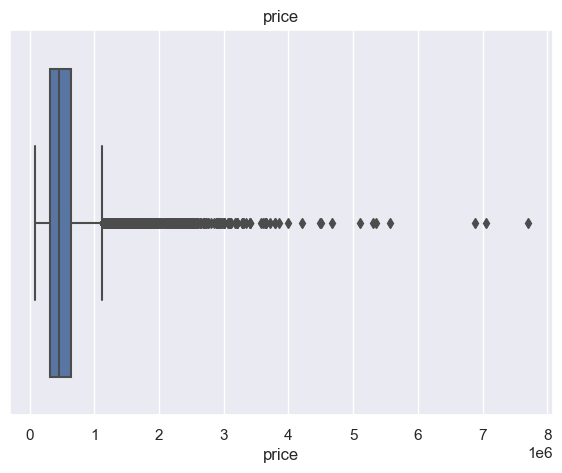

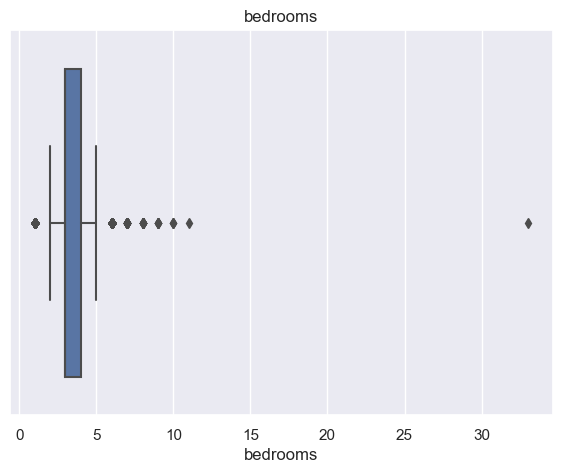

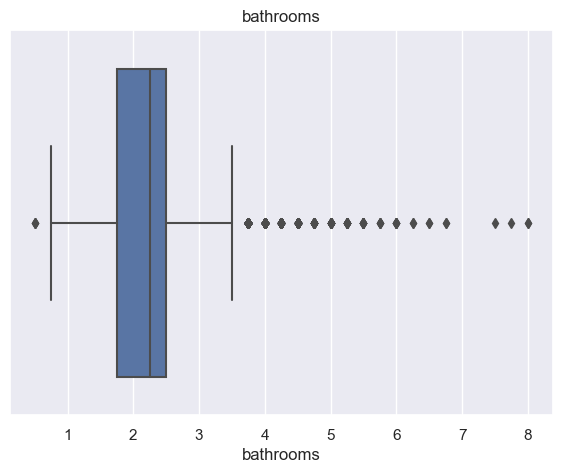

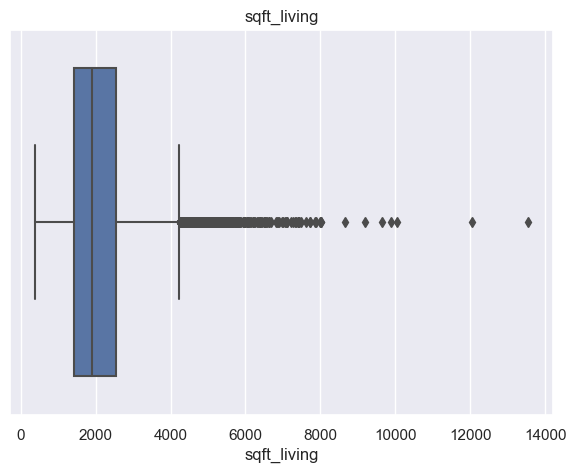

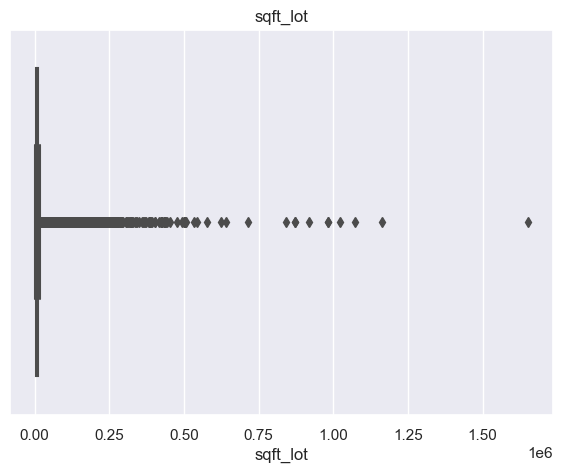

In [1069]:
# use boxplots to visualize outliers in the columns by looking at their distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Create a boxplot for each numerical column
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

From the boxplots we can see some particles of outliers but with our data, the outliers seems to be equally important!

In [1070]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(df_updated, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df_updated[column], 25), np.percentile(df_updated[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = df_updated[df_updated[column] > upper]
    lower_outliers = df_updated[df_updated[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

In [1071]:
df_updated['sqft_basement'].unique()

array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

In [1072]:

for i in df_updated.columns:
    print('Total outliers in ', i)
    calc_interquartile(df_updated, i)
    print()

Total outliers in  price
Lower outliers 0
Upper outliers 1136
total outliers 1136

Total outliers in  bedrooms
Lower outliers 191
Upper outliers 322
total outliers 513

Total outliers in  bathrooms
Lower outliers 3
Upper outliers 546
total outliers 549

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 2373
total outliers 2373

Total outliers in  floors
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  waterfront
Lower outliers 0
Upper outliers 142
total outliers 142

Total outliers in  view
Lower outliers 0
Upper outliers 2064
total outliers 2064

Total outliers in  condition
Lower outliers 28
Upper outliers 0
total outliers 28

Total outliers in  grade
Lower outliers 263
Upper outliers 1605
total outliers 1868

Total outliers in  sqft_basement
Lower outliers 0
Upper outliers 484
total outliers 484

Total outliers in  zipcode
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  lat
Lower outliers 2
Upper outliers 0
total outliers 2

Tot

Lower outliers 0
Upper outliers 1136
total outliers 1136


1129500.0 -162500.0


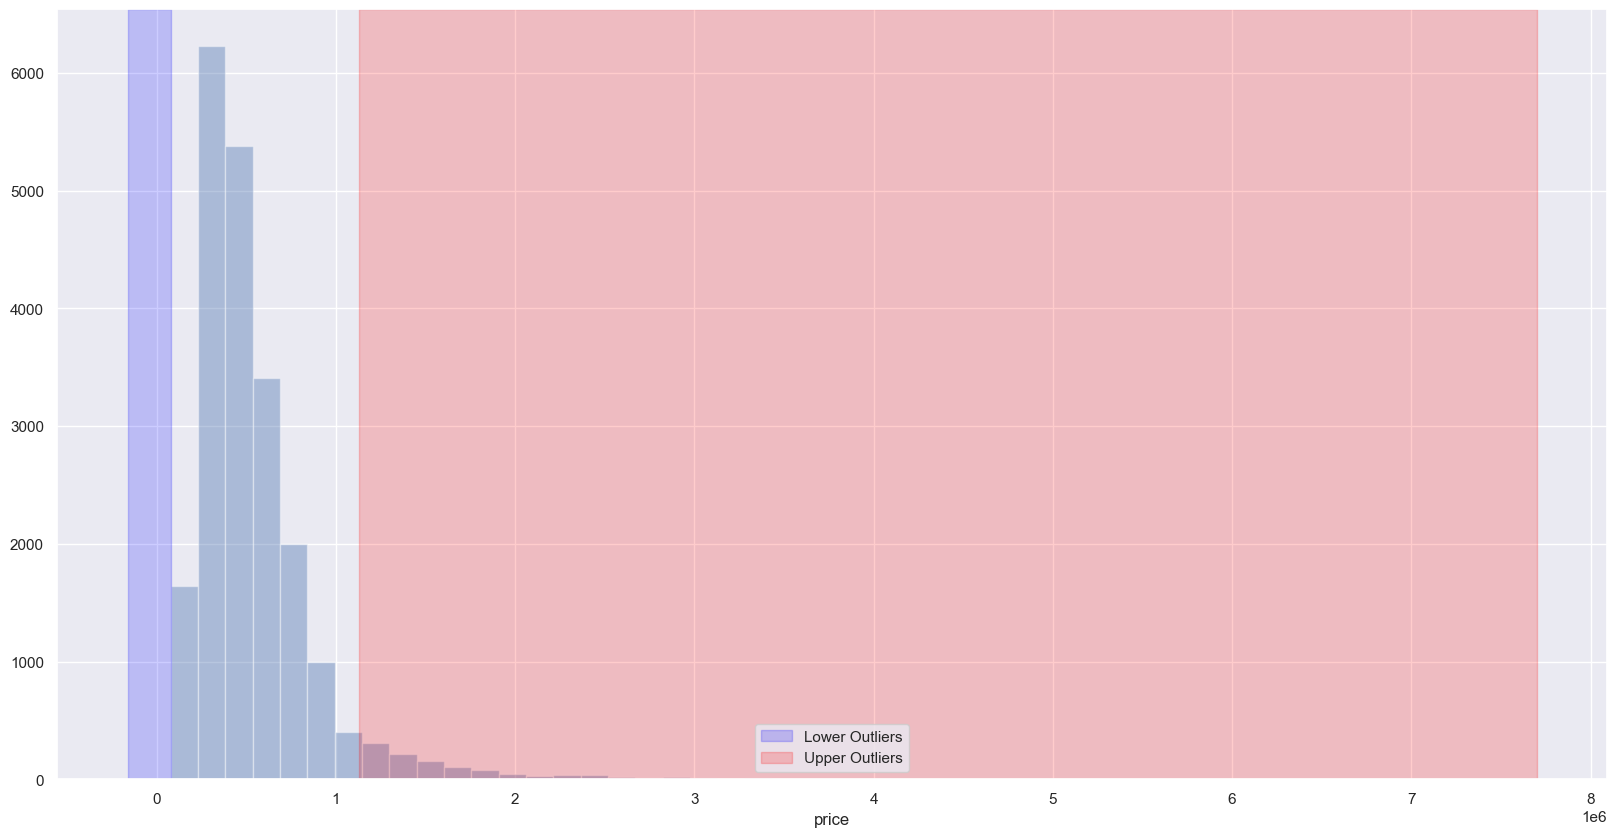

In [1073]:
#plotting outliers graph for 'price' feature 
calc_interquartile(df_updated, 'price')
plt.figure(figsize = (20,10))
sns.distplot(df_updated['price'], kde=False)
print(upper, lower)
plt.axvspan(xmin = lower,xmax= df_updated['price'].min(),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = upper,xmax= df_updated['price'].max(),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [1074]:
""" creating function for calculating zscore which is subtracting the mean from every data point and dividing by the standard deviation and if the zscore value of any data point 
is less than -3 or greater than 3, then that data point is an outlier"""

def z_score(df_updated, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 hence i took 3
    threshold = 3
    # calculating the mean of the passed column
    mean = np.mean(df_updated[column])
    # calculating the standard deviation of the passed column
    std = np.std(df_updated[column])
    for i in df_updated[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 401
1129500.0 -162500.0


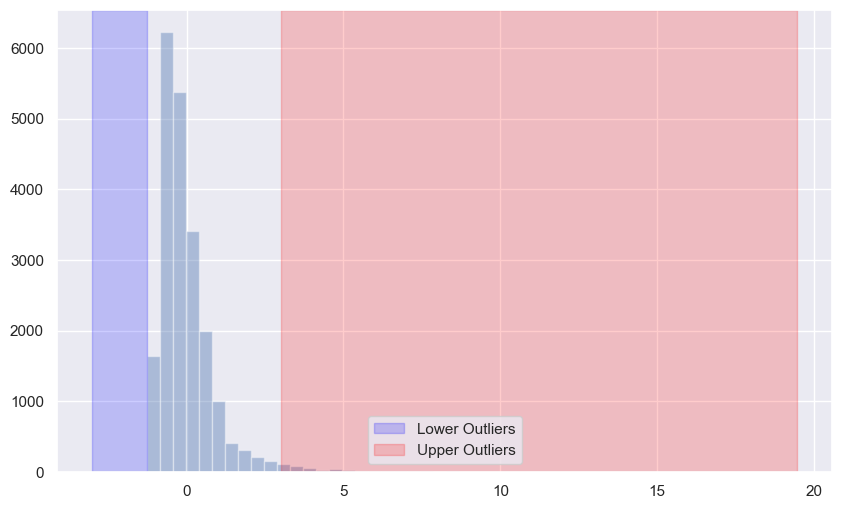

In [1075]:
#plotting outliers graph for 'price' feature 
z_score(df_updated, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [1076]:
#remove the outliers from price using zscore
dj=[]
for i in df_updated.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
df_updated['P'] = dj

x = df_updated.drop(df_updated[df_updated['P'] == 0.0].index) 
x.shape

(20742, 18)

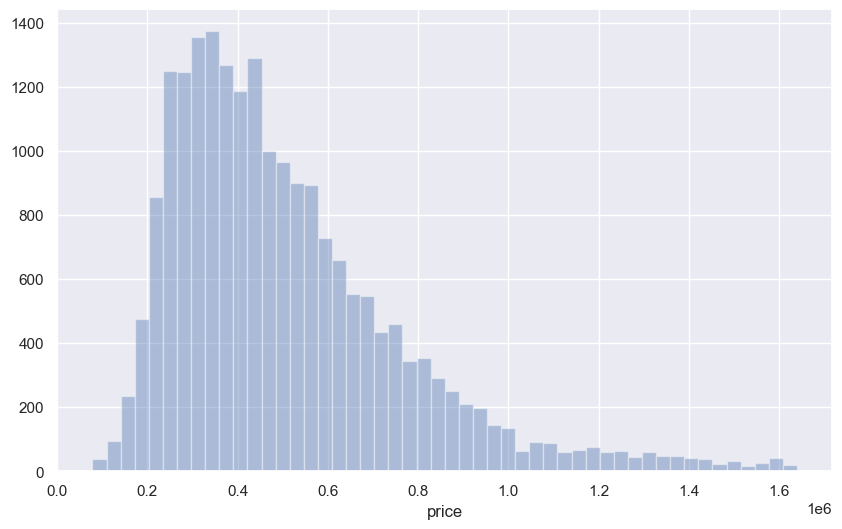

In [1077]:
plt.figure(figsize = (10,6))
sns.distplot(x['price'], kde=False)
plt.show()

In [1078]:
# Drop upper outliers 
refined_data= df_updated.drop(df_updated[df_updated['price']>upper].index)
refined_data

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation,P
0,221900.0,3,1.00,5650,1.0,0,0,3,7,0.0,98178,47.5112,-122.257,1340,5650,59,0.0,221900.0
1,538000.0,3,2.25,7242,2.0,0,0,3,7,400.0,98125,47.7210,-122.319,1690,7639,63,40.0,538000.0
2,180000.0,2,1.00,10000,1.0,0,0,3,6,0.0,98028,47.7379,-122.233,2720,8062,82,0.0,180000.0
3,604000.0,4,3.00,5000,1.0,0,0,5,7,910.0,98136,47.5208,-122.393,1360,5000,49,0.0,604000.0
4,510000.0,3,2.00,8080,1.0,0,0,3,8,0.0,98074,47.6168,-122.045,1800,7503,28,0.0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,360000.0,3,2.50,1131,3.0,0,0,3,8,0.0,98103,47.6993,-122.346,1530,1509,5,0.0,360000.0
21139,400000.0,4,2.50,5813,2.0,0,0,3,8,0.0,98146,47.5107,-122.362,1830,7200,1,0.0,400000.0
21140,402101.0,2,0.75,1350,2.0,0,0,3,7,0.0,98144,47.5944,-122.299,1020,2007,5,0.0,402101.0
21141,400000.0,3,2.50,2388,2.0,0,0,3,8,0.0,98027,47.5345,-122.069,1410,1287,11,0.0,400000.0


In [1079]:
refined_data.drop('P',axis =1 ,inplace =True)

## 6. Regression Modelling

In [1080]:
# Check the correlation
refined_data.corr()['price']

price                     1.000000
bedrooms                  0.293232
bathrooms                 0.454520
sqft_lot                  0.093728
floors                    0.272829
waterfront                0.047495
view                      0.223993
condition                 0.036541
grade                     0.630348
sqft_basement             0.234180
zipcode                  -0.018031
lat                       0.431413
long                      0.072477
sqft_living15             0.562271
sqft_lot15                0.083367
years_since_built        -0.060464
years_since_renovation    0.085367
Name: price, dtype: float64

### b) Scaling Data

In [1096]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()
variables = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
             'grade', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
             'years_since_built', 'years_since_renovation']

# Fit and transform the independent variables
df_scaled = scaler.fit_transform(refined_data[ ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
             'grade', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
             'years_since_built', 'years_since_renovation']])
df_scaled

array([[-0.36402612, -1.48279035, -0.22280811, ..., -0.25666117,
         0.5322521 , -0.16033049],
       [-0.36402612,  0.27915264, -0.18321319, ..., -0.18114006,
         0.66964802,  3.86695393],
       [-1.46735448, -1.48279035, -0.11461848, ..., -0.16507901,
         1.32227864, -0.16033049],
       ...,
       [-1.46735448, -1.83517894, -0.32975419, ..., -0.39498364,
        -1.32259283, -0.16033049],
       [-0.36402612,  0.63154124, -0.3039379 , ..., -0.4223216 ,
        -1.11649895, -0.16033049],
       [-1.46735448, -1.83517894, -0.33656889, ..., -0.41966374,
        -1.28824385, -0.16033049]])

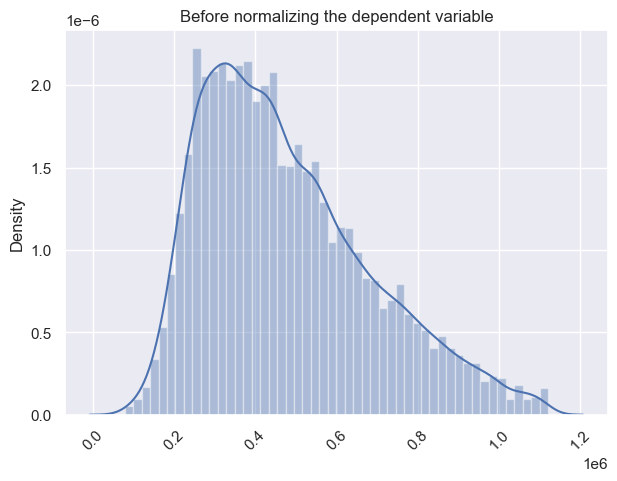

In [1087]:
# Visualize the distribution of y
sns.distplot(y);
plt.xticks(rotation=45);
plt.title("Before normalizing the dependent variable");

The y variable is highly positively skewed!

### c) Normalizing The Dependent Variable

This is bell_curved hence Normal Distribution


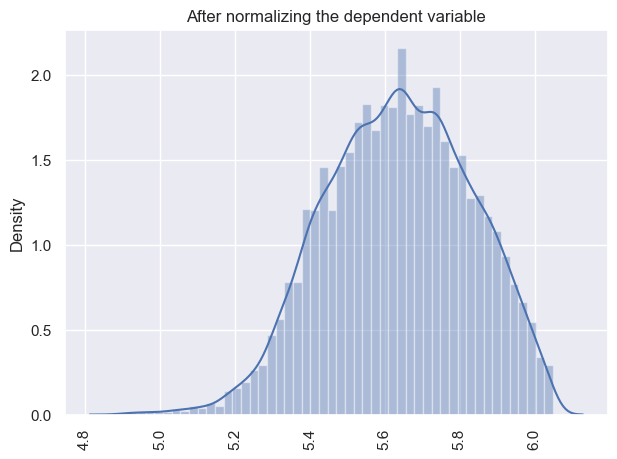

In [1088]:
y = np.log10(y)
#we just normalized the y variable using log10 which is available in numpy package 
#now lets plot the data

sns.distplot(y);
plt.xticks(rotation=90);
plt.title("After normalizing the dependent variable");
print("This is bell_curved hence Normal Distribution")

In [1095]:
# Assuming df_scaled contains the normalized independent variables and target variable

# Add constant column to the normalized data
df_scaled = sm.add_constant(df_scaled)

# Create the regression model
model = sm.OLS(y, df_scaled)

# Fit the model
results = model.fit()

# Get the summary of the regression model
summary = results.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2916.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:32:14   Log-Likelihood:                 16540.
No. Observations:               20007   AIC:                        -3.305e+04
Df Residuals:                   19990   BIC:                        -3.291e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6367      0.001   7528.378      0.0